In [4]:
# importing the data using pandas
import pandas as pd
df=pd.read_csv('/content/Copy of Restaurant_Reviews.tsv',sep='\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


# New Section

In [5]:
# converting the whole dataframe to lower case letters
df = df.applymap(lambda s: s.lower() if type(s) == str else s)
df

,Review,Liked
0,wow... loved this place.,1
1,crust is not good.,0
2,not tasty and the texture was just nasty.,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1
...,...,...
995,i think food should have flavor and texture an...,0
996,appetite instantly gone.,0
997,overall i was not impressed and would not go b...,0
998,"the whole experience was underwhelming, and i ...",0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
#droping all this dublicates if present any
df= df.drop_duplicates(keep='last')
df

,Review,Liked
0,wow... loved this place.,1
1,crust is not good.,0
2,not tasty and the texture was just nasty.,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1
...,...,...
995,i think food should have flavor and texture an...,0
996,appetite instantly gone.,0
997,overall i was not impressed and would not go b...,0
998,"the whole experience was underwhelming, and i ...",0


In [8]:
df['Review'][455]

'the chicken wings contained the driest chicken meat i have ever eaten.'

In [9]:
df['Liked'][455]

0

In [10]:
df['Review'][4]

'the selection on the menu was great and so were the prices.'

In [11]:
df['Liked'][4]

1

<Axes: >

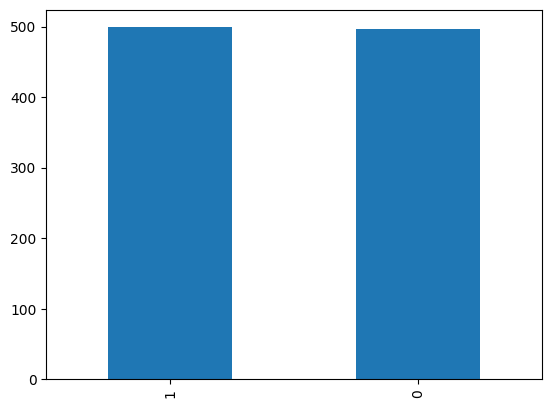

In [12]:
df['Liked'].value_counts().plot(kind='bar')

In [13]:
x = df['Review'].values
y = df['Liked'].values


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [15]:
x_test.shape

(249,)

In [16]:
x_train.shape

(747,)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)
x_train_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
x_test_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
# METHOD 1 using SVC
from sklearn.svm import SVC
model=SVC()
model.fit(x_train_vect,y_train)

SVC()

In [20]:
y_pred= model.predict(x_test_vect)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1])

In [21]:
# As shown the Accuracy score is very low i.e ~72.6%
#This is due to every customer has different way of expression whether they liked or not.
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7269076305220884

In [22]:
# Method 2 using Pipeline
from sklearn.pipeline import make_pipeline
model2 =make_pipeline(CountVectorizer(),SVC())
model2.fit(x_train,y_train)
y_pred2 =model2.predict(x_test)
y_pred2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [25]:
#The value for the this method is higher than the method 1 i.e ~81.5%
accuracy_score(y_pred2,y_test)

0.8152610441767069

In [26]:
# Method 3 Using NB(Naive Bayes) model
from sklearn.naive_bayes import MultinomialNB
model3=MultinomialNB()
model3.fit(x_train_vect,y_train)
y_pred3 = model3.predict(x_test_vect)
y_pred3

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [27]:
accuracy_score(y_pred3,y_test)

0.7469879518072289

In [28]:
#METHOD 4  Using NB and countvectorizer pipeline
from sklearn.pipeline import make_pipeline
model4 = make_pipeline(CountVectorizer(),MultinomialNB())
model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)
y_pred4

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [29]:
accuracy_score(y_pred4,y_test)

0.7791164658634538

In [43]:
#Accuracy of all the 4 models
# 1)SVC                    = 72.69076305220884 %
# 2)SVC + count vectorizer = 81.52610441767069 %
# 3)NB                     = 74.69879518072289 %
# 4)NB + count vectorizer  = 77.91164658634538 %

# So the best model to be used would be model 2

In [49]:
reload_model=joblib.load('Like_detector')
ip = input("Enter your reveiws: (0-negative 1-positive)")
op = reload_model.predict([ip])
if(op):
  print("Positive review")
else:
  print("Negative review")

Enter your reveiws: (0-negative 1-positive)Not very good resturant
Negative review


In [31]:
import joblib
joblib.dump(model2,'Like_detector')

['Like_detector']

In [32]:
import joblib
reload_model=joblib.load('/content/Like_detector')

In [33]:
reload_model.predict(['good'])

array([1])

In [34]:
 reload_model.predict(['not good'])

array([0])

In [35]:
!pip install streamlit --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 88.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.6 MB/s eta 0:00:00


In [36]:
%%writefile app.py
import streamlit as st
import joblib
st.title("Review Detector")
reload_model=joblib.load('Like_detector')
ip = st.text_input("Enter your reveiws: (0-negative 1-positive)")
op = reload_model.predict([ip])
if st.button('PREDICT'):
  st.title(op[0])

Writing app.py


In [41]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] \ fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.80.154.207:8501

npx: installed 22 in 3.926s
your url is: https://empty-goats-grab.loca.lt
  Stopping...
^C


In [53]:
# Running
python -m streamlit run app.py

SyntaxError: ignored